### Goal

- Industry: Which ads to show, how much to pay, optimize ads text and position.
    - Challenge: huge datasets, huge # of features
- this project: analyze current ads performance & predict future performance.
    - Company: food delivery, online ads (Google/FB)
    - 40 Ad campaigns:
        * identify top 5 ads groups, what are they? what metrics did u use to decide? pros/cons.
        * for each group, predict # ads will be shown on Dec 15 (assume each ads group keeps following its trend.)
        * cluster ads into 3 groups, avg_cost_per_click(going up, flat, going down).

In [111]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings 
warnings.filterwarnings('ignore')

### Load Data

In [2]:
df=pd.read_csv("ad_table.csv")
df.head()

date  shown  clicked  converted  avg_cost_per_click  total_revenue  \
0  2015-10-01  65877     2339         43                0.90         641.62   
1  2015-10-02  65100     2498         38                0.94         756.37   
2  2015-10-03  70658     2313         49                0.86         970.90   
3  2015-10-04  69809     2833         51                1.01         907.39   
4  2015-10-05  68186     2696         41                1.00         879.45   

           ad  
0  ad_group_1  
1  ad_group_1  
2  ad_group_1  
3  ad_group_1  
4  ad_group_1

In [3]:
df.shape

(2115, 7)

In [4]:
df['Cost']=df['avg_cost_per_click']*df['clicked']
df.head()

date  shown  clicked  converted  avg_cost_per_click  total_revenue  \
0  2015-10-01  65877     2339         43                0.90         641.62   
1  2015-10-02  65100     2498         38                0.94         756.37   
2  2015-10-03  70658     2313         49                0.86         970.90   
3  2015-10-04  69809     2833         51                1.01         907.39   
4  2015-10-05  68186     2696         41                1.00         879.45   

           ad     Cost  
0  ad_group_1  2105.10  
1  ad_group_1  2348.12  
2  ad_group_1  1989.18  
3  ad_group_1  2861.33  
4  ad_group_1  2696.00

In [5]:
df_adgrp = df.groupby('ad').sum().reset_index()
df_adgrp.drop('avg_cost_per_click',axis=1,inplace=True)
df_adgrp.head()

ad    shown  clicked  converted  total_revenue        Cost
0   ad_group_1  3675315   143409       2497       39379.84   140182.53
1  ad_group_10  6120471    86898       1016       15579.83   101388.13
2  ad_group_11   991801    60565       2935       40652.32   106637.70
3  ad_group_12  1517090    90682       8295      129286.04   190187.61
4  ad_group_13  8237478   705941      66741     1054962.03  1237195.04

### 1. Top 5 ads groups

Common metrics used in ad analysis:
- **Click-through-rate (CTR)**: clicks/impressions*100%.
A high CTR (2% as benchmark) indicates ads being well recieved by relevant audience.
- **Conversion Rate (CR)**: conversions/clicks*100%.
- **Cost Per Click (CPC)**: total spent/clicks. 
- **Cost Per Conversion**: total Cost/converted.
- **Average Order Value**: total revenue/converted.
- **Return on Advertising Spend (ROAS)**: total Revenue/total Cost
- **Cost Per Mille (CPM)**: total Cost/impressions*1000 (brand awareness as business performance metric).

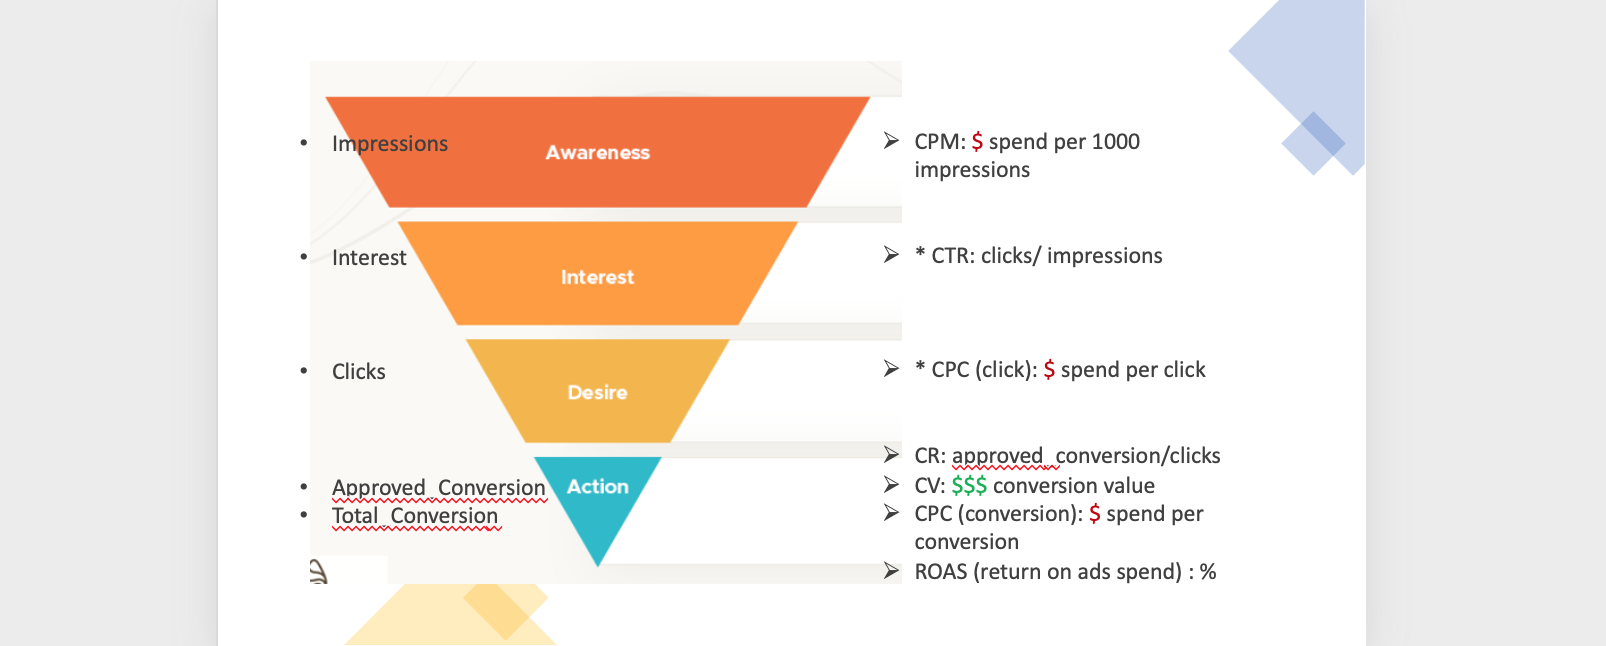

#### Metrics 1: CTR - engagement

- Click thru Rate=clicked/shown (impression)

In [6]:
df_adgrp['CTR']=round(df_adgrp['clicked']/df_adgrp['shown']*100,2)
df_adgrp.head()

ad    shown  clicked  converted  total_revenue        Cost   CTR
0   ad_group_1  3675315   143409       2497       39379.84   140182.53  3.90
1  ad_group_10  6120471    86898       1016       15579.83   101388.13  1.42
2  ad_group_11   991801    60565       2935       40652.32   106637.70  6.11
3  ad_group_12  1517090    90682       8295      129286.04   190187.61  5.98
4  ad_group_13  8237478   705941      66741     1054962.03  1237195.04  8.57

#### Metrics 2: Conversion_Rate - result

- Define converison: the ‘converted’ column
- Conversion Rate=converted/clicked

In [7]:
df_adgrp['Conversion_Rate']=round(df_adgrp['converted']/df_adgrp['clicked']*100,2)
df_adgrp.head()

ad    shown  clicked  converted  total_revenue        Cost   CTR  \
0   ad_group_1  3675315   143409       2497       39379.84   140182.53  3.90   
1  ad_group_10  6120471    86898       1016       15579.83   101388.13  1.42   
2  ad_group_11   991801    60565       2935       40652.32   106637.70  6.11   
3  ad_group_12  1517090    90682       8295      129286.04   190187.61  5.98   
4  ad_group_13  8237478   705941      66741     1054962.03  1237195.04  8.57   

   Conversion_Rate  
0             1.74  
1             1.17  
2             4.85  
3             9.15  
4             9.45

#### Money

#### Metrics 3: ROAS

- Cost=avg_cost_per_click*clicked
- ROAS=total_revenue/Cost

In [8]:
df_adgrp['ROAS']=round(df_adgrp['total_revenue']/(df_adgrp['Cost']),2)
df_adgrp.head()

ad    shown  clicked  converted  total_revenue        Cost   CTR  \
0   ad_group_1  3675315   143409       2497       39379.84   140182.53  3.90   
1  ad_group_10  6120471    86898       1016       15579.83   101388.13  1.42   
2  ad_group_11   991801    60565       2935       40652.32   106637.70  6.11   
3  ad_group_12  1517090    90682       8295      129286.04   190187.61  5.98   
4  ad_group_13  8237478   705941      66741     1054962.03  1237195.04  8.57   

   Conversion_Rate  ROAS  
0             1.74  0.28  
1             1.17  0.15  
2             4.85  0.38  
3             9.15  0.68  
4             9.45  0.85

#### Metrics 4: Average Order Value

- AOV=total_revenue/converted

In [9]:
df_adgrp['avg_OrderValue']=round(df_adgrp['total_revenue']/df_adgrp['converted'],2)
df_adgrp.head()

ad    shown  clicked  converted  total_revenue        Cost   CTR  \
0   ad_group_1  3675315   143409       2497       39379.84   140182.53  3.90   
1  ad_group_10  6120471    86898       1016       15579.83   101388.13  1.42   
2  ad_group_11   991801    60565       2935       40652.32   106637.70  6.11   
3  ad_group_12  1517090    90682       8295      129286.04   190187.61  5.98   
4  ad_group_13  8237478   705941      66741     1054962.03  1237195.04  8.57   

   Conversion_Rate  ROAS  avg_OrderValue  
0             1.74  0.28           15.77  
1             1.17  0.15           15.33  
2             4.85  0.38           13.85  
3             9.15  0.68           15.59  
4             9.45  0.85           15.81

### Brand Awareness
if Cost spent on impression, can also consider:

#### Metrics 5: Impression
- 'shown' column
- measure brand awareness

In [10]:
df_adgrp['Impression']=df_adgrp['shown']
df_adgrp.head()

ad    shown  clicked  converted  total_revenue        Cost   CTR  \
0   ad_group_1  3675315   143409       2497       39379.84   140182.53  3.90   
1  ad_group_10  6120471    86898       1016       15579.83   101388.13  1.42   
2  ad_group_11   991801    60565       2935       40652.32   106637.70  6.11   
3  ad_group_12  1517090    90682       8295      129286.04   190187.61  5.98   
4  ad_group_13  8237478   705941      66741     1054962.03  1237195.04  8.57   

   Conversion_Rate  ROAS  avg_OrderValue  Impression  
0             1.74  0.28           15.77     3675315  
1             1.17  0.15           15.33     6120471  
2             4.85  0.38           13.85      991801  
3             9.15  0.68           15.59     1517090  
4             9.45  0.85           15.81     8237478

#### Metrics 6: Cost Per Mille (CPM)
- Cost=avg_cost_per_click*clicked
- CPM=Cost/shown*1000

In [11]:
df_adgrp['CPM']=round(df_adgrp['Cost']/df_adgrp['Impression']*1000,2)
df_adgrp.head()

ad    shown  clicked  converted  total_revenue        Cost   CTR  \
0   ad_group_1  3675315   143409       2497       39379.84   140182.53  3.90   
1  ad_group_10  6120471    86898       1016       15579.83   101388.13  1.42   
2  ad_group_11   991801    60565       2935       40652.32   106637.70  6.11   
3  ad_group_12  1517090    90682       8295      129286.04   190187.61  5.98   
4  ad_group_13  8237478   705941      66741     1054962.03  1237195.04  8.57   

   Conversion_Rate  ROAS  avg_OrderValue  Impression     CPM  
0             1.74  0.28           15.77     3675315   38.14  
1             1.17  0.15           15.33     6120471   16.57  
2             4.85  0.38           13.85      991801  107.52  
3             9.15  0.68           15.59     1517090  125.36  
4             9.45  0.85           15.81     8237478  150.19

In [12]:
dummy_var=df_adgrp.columns.values[6:13]
dummy_var

array(['CTR', 'Conversion_Rate', 'ROAS', 'avg_OrderValue', 'Impression',
       'CPM'], dtype=object)

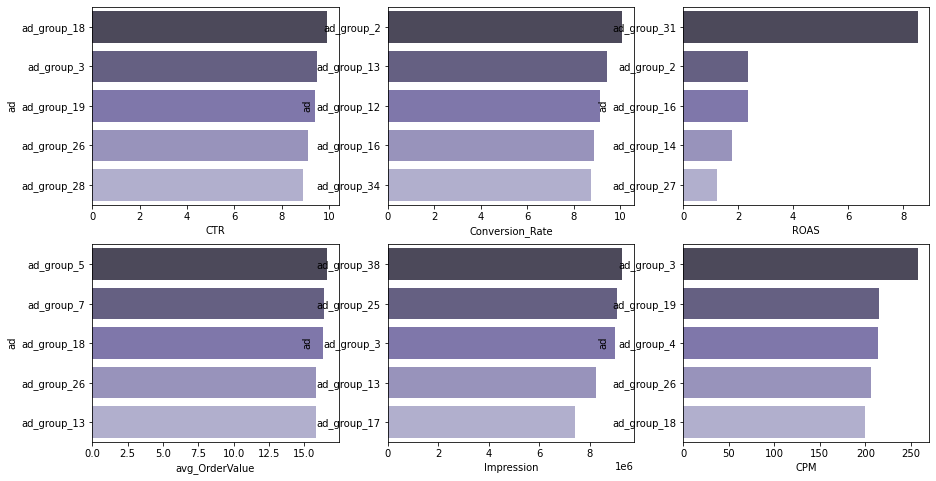

In [13]:
fig, axes = plt.subplots(2, 3, figsize=(15, 8))
i=0
m=0
for i in range(len(dummy_var)-1):
    while m<=1:
        n=0
        while n<=2:
            sns.barplot(ax=axes[m, n], data=df_adgrp, x=dummy_var[i], y='ad',
                        order=df_adgrp.sort_values(dummy_var[i],ascending=False).ad.iloc[:5],
                        palette="Purples_d")
            i=i+1
            n=n+1
        m=m+1

Based on the above calculation, we can see that the top 5 best ad groups are: 
 - By **CTR**: `ad_group_18`, `ad_group_3`, `ad_group_19`, `ad_group_26`, `ad_group_28`. 
 - By **Conversion Rate**: `ad_group_2`, `ad_group_13`, `ad_group_12`, `ad_group_16`, `ad_group_34`. 
 - By **ROAS**: `ad_group_31`, `ad_group_2`, `ad_group_16`, `ad_group_14`, `ad_group_27`. 
 - By **AOV**: `ad_group_5`, `ad_group_7`, `ad_group_18`, `ad_group_26`, `ad_group_13`. 
 - By **Impression**: `ad_group_38`, `ad_group_25`, `ad_group_3`, `ad_group_13`, `ad_group_17`. 

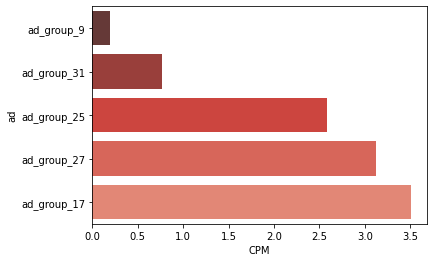

In [14]:
i=5
sns.barplot(data=df_adgrp, x=dummy_var[i], y='ad',
            order=df_adgrp.sort_values(dummy_var[i],ascending=True).ad.iloc[:5],
            palette="Reds_d")

- By **Impression**: `ad_group_9`, `ad_group_31`, `ad_group_25`, `ad_group_27`, `ad_group_17`. 

### 2. Time Series: Predict # of ads will be shown on Dec, 15.

In [52]:
i=df.groupby(['date','ad'])['shown'].sum().reset_index()
i

date           ad   shown
0     2015-10-01   ad_group_1   65877
1     2015-10-01  ad_group_10   97590
2     2015-10-01  ad_group_11   16451
3     2015-10-01  ad_group_12   26000
4     2015-10-01  ad_group_13  162075
...          ...          ...     ...
2110  2015-11-22   ad_group_5   56566
2111  2015-11-22   ad_group_6   40800
2112  2015-11-22   ad_group_7   56528
2113  2015-11-22   ad_group_8   43832
2114  2015-11-22   ad_group_9  123598

[2115 rows x 3 columns]

In [159]:
imp=i.pivot(index="date", columns="ad", values="shown")
imp.head()

ad          ad_group_1  ad_group_10  ad_group_11  ad_group_12  ad_group_13  \
date                                                                         
2015-10-01     65877.0      97590.0      16451.0      26000.0     162075.0   
2015-10-02     65100.0     101799.0      17699.0      26456.0     156520.0   
2015-10-03     70658.0     102065.0      17786.0      29113.0     158721.0   
2015-10-04     69809.0     104539.0      16349.0      27088.0     168742.0   
2015-10-05     68186.0     108520.0      17703.0      27250.0     172151.0   

ad          ad_group_14  ad_group_15  ad_group_16  ad_group_17  ad_group_18  \
date                                                                          
2015-10-01       8556.0      14811.0      29364.0     119141.0      75128.0   
2015-10-02       8086.0      15326.0      28636.0     122091.0      82618.0   
2015-10-03       7708.0      16063.0      30257.0     125866.0      91208.0   
2015-10-04       7665.0      15156.0      29979.0     117050.0      79333.0   
2015-10-05       7719.0      15088.0      30600.0     126830.0      88208.0   

ad          ...  ad_group_37  ad_group_38  ad_group_39  ad_group_4  \
date        ...                                                      
2015-10-01  ...      64526.0     171855.0      21868.0     76786.0   
2015-10-02  ...      68744.0     158942.0      23487.0     81869.0   
2015-10-03  ...      66879.0     174593.0      21925.0     83304.0   
2015-10-04  ...      71882.0     163974.0      21892.0     89154.0   
2015-10-05  ...      69156.0     171412.0      23877.0     83704.0   

ad          ad_group_40  ad_group_5  ad_group_6  ad_group_7  ad_group_8  \
date                                                                      
2015-10-01      67611.0     44544.0     33559.0     48431.0     38089.0   
2015-10-02      71018.0     46663.0     35711.0     51042.0     37322.0   
2015-10-03      75323.0     47227.0     37048.0     48027.0     36878.0   
2015-10-04      74099.0     47088.0     37934.0     51300.0     35019.0   
2015-10-05      74188.0     43155.0     34870.0     49241.0     38195.0   

ad          ad_group_9  
date                    
2015-10-01    102898.0  
2015-10-02    110227.0  
2015-10-03    109790.0  
2015-10-04    111172.0  
2015-10-05    120625.0  

[5 rows x 40 columns]

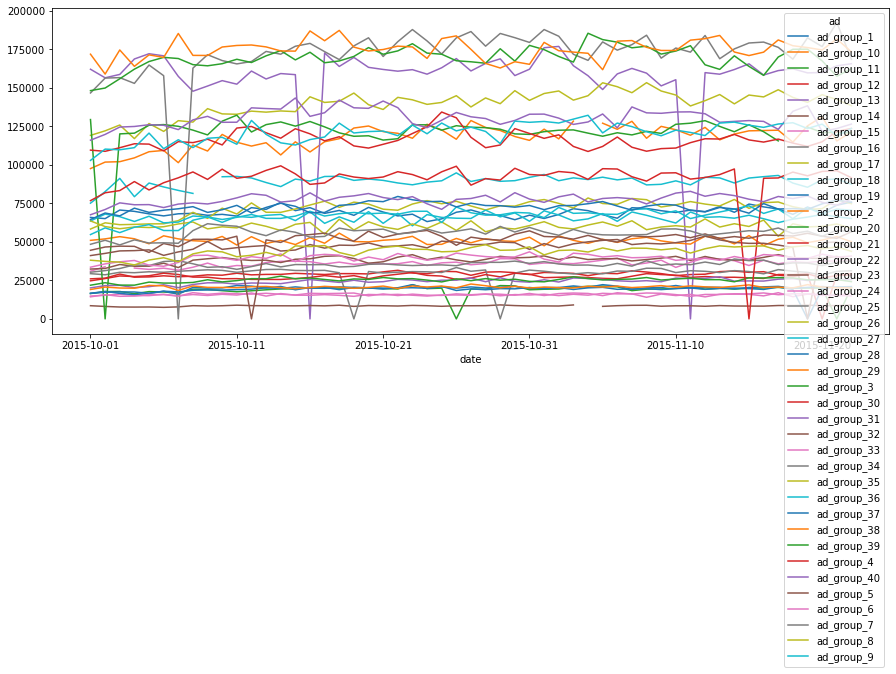

In [17]:
imp.plot(figsize=(15, 6))
plt.show()

In [19]:
import plotly.express as px
fig = px.area(imp, facet_col='ad', facet_col_wrap=8)
fig.show()

### ARIMA (AutoRegressive Integrated Moving Average)

**~ARIMA(p, d, q)**

In [74]:
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.stattools import acf,pacf

In [ ]:
#imp.isna().sum()
#10.14.18.20.24
imp.loc[(imp.ad_group_10.isna()),'ad_group_10']=0
imp.loc[(imp.ad_group_14.isna()),'ad_group_14']=0
imp.loc[(imp.ad_group_18.isna()),'ad_group_18']=0
imp.loc[(imp.ad_group_20.isna()),'ad_group_20']=0
imp.loc[(imp.ad_group_24.isna()),'ad_group_24']=0
#imp.isna().sum()

In [171]:
imp1=imp.iloc[:,0].reset_index().set_index('date')
imp1.head()

ad_group_1
date                  
2015-10-01     65877.0
2015-10-02     65100.0
2015-10-03     70658.0
2015-10-04     69809.0
2015-10-05     68186.0

In [175]:
mm=imp1.unstack().reset_index()
mm.head()

level_0        date        0
0  ad_group_1  2015-10-01  65877.0
1  ad_group_1  2015-10-02  65100.0
2  ad_group_1  2015-10-03  70658.0
3  ad_group_1  2015-10-04  69809.0
4  ad_group_1  2015-10-05  68186.0

In [ ]:
mm.drop('ad_group_1',axis=0,inplace=True)

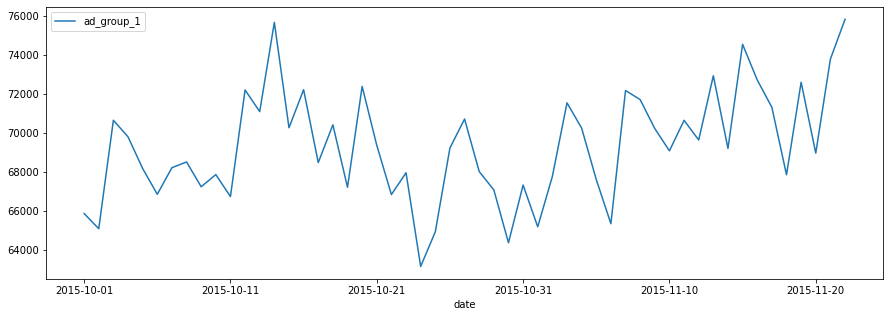

In [123]:
imp1.plot(figsize=(15,5))

In [157]:
imp1['ad_group_1']

date
2015-10-01    65877.0
2015-10-02    65100.0
2015-10-03    70658.0
2015-10-04    69809.0
2015-10-05    68186.0
2015-10-06    66864.0
2015-10-07    68227.0
2015-10-08    68520.0
2015-10-09    67250.0
2015-10-10    67873.0
2015-10-11    66747.0
2015-10-12    72211.0
2015-10-13    71101.0
2015-10-14    75676.0
2015-10-15    70274.0
2015-10-16    72223.0
2015-10-17    68489.0
2015-10-18    70423.0
2015-10-19    67222.0
2015-10-20    72393.0
2015-10-21    69372.0
2015-10-22    66850.0
2015-10-23    67967.0
2015-10-24    63166.0
2015-10-25    64943.0
2015-10-26    69240.0
2015-10-27    70721.0
2015-10-28    68030.0
2015-10-29    67087.0
2015-10-30    64381.0
2015-10-31    67336.0
2015-11-01    65199.0
2015-11-02    67780.0
2015-11-03    71552.0
2015-11-04    70256.0
2015-11-05    67618.0
2015-11-06    65356.0
2015-11-07    72183.0
2015-11-08    71716.0
2015-11-09    70231.0
2015-11-10    69090.0
2015-11-11    70656.0
2015-11-12    69647.0
2015-11-13    72939.0
2015-11-14    69212.0
2015-

### Decomposition:
- describe the trend and seasonal factors in a time series
    - Additive:  = Trend + Seasonal + Random
    - Multiplicative:  = Trend * Seasonal * Random

In [145]:
from statsmodels.tsa.seasonal import seasonal_decompose 
decomp=seasonal_decompose(imp1['ad_group_1'], model ='addictive') 
decomp.plot()

ValueError: You must specify a period or x must be a pandas object with a DatetimeIndex with a freq not set to None

### 3. Cluster ads into 3 groups
- avg_cost_per_click (going up, flat, going down).